<h1> Analisis Prediksi Harga Rumah JABODETABEK Berdasarkan Spesifikasi Menggunakan Linear Regression <h1>

## Import Semua Packages/Library yang Digunakan

In [21]:
from scipy.stats import zscore
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Data Wrangling

In [22]:
df = pd.read_csv("jabodetabek_house_price.csv")
df.head(5)

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,...,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,https://www.rumah123.com/properti/bekasi/hos11...,2.990000e+09,Rumah cantik Sumarecon Bekasi\nLingkungan asri...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,...,4400 mah,0.0,1.0,2.0,5.0,2017.0,bagus,NaN,0.0,unfurnished
1,https://www.rumah123.com/properti/bekasi/hos10...,1.270000e+09,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,rumah,...,2200 mah,0.0,0.0,2.0,NaN,NaN,bagus,NaN,0.0,NaN
2,https://www.rumah123.com/properti/bekasi/hos10...,1.950000e+09,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,...,2200 mah,1.0,1.0,2.0,NaN,NaN,bagus,NaN,1.0,unfurnished
3,https://www.rumah123.com/properti/bekasi/hos10...,3.300000e+09,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,...,3500 mah,1.0,1.0,2.0,6.0,2016.0,bagus sekali,utara,2.0,unfurnished
4,https://www.rumah123.com/properti/bekasi/hos10...,4.500000e+09,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,...,3500 mah,1.0,1.0,2.0,9.0,2013.0,bagus,utara,1.0,unfurnished


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   3553 non-null   object 
 1   price_in_rp           3553 non-null   float64
 2   title                 3553 non-null   object 
 3   address               3553 non-null   object 
 4   district              3553 non-null   object 
 5   city                  3553 non-null   object 
 6   lat                   3553 non-null   float64
 7   long                  3553 non-null   float64
 8   facilities            3553 non-null   object 
 9   property_type         3552 non-null   object 
 10  ads_id                3549 non-null   object 
 11  bedrooms              3519 non-null   float64
 12  bathrooms             3524 non-null   float64
 13  land_size_m2          3551 non-null   float64
 14  building_size_m2      3551 non-null   float64
 15  carports             

In [24]:
df.describe()

,price_in_rp,lat,long,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,garages
count,3.553000e+03,3553.000000,3553.000000,3519.000000,3524.000000,3551.000000,3551.000000,3553.000000,3553.000000,3553.000000,3547.000000,2108.000000,2108.000000,3553.000000
mean,4.191685e+09,-6.324721,106.792881,3.326513,2.624858,204.806815,186.587440,1.197861,0.496482,0.370391,1.764590,3.880930,2018.137097,0.708978
std,1.375067e+10,0.129245,0.172159,2.672148,2.696497,402.127746,248.443471,1.114996,0.685723,0.536024,0.637349,7.603708,7.641448,1.311879
min,4.200000e+07,-6.894828,106.402315,1.000000,1.000000,12.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1870.000000,0.000000
25%,8.000000e+08,-6.397933,106.687295,2.000000,2.000000,75.000000,65.500000,1.000000,0.000000,0.000000,1.000000,0.000000,2016.000000,0.000000
50%,1.500000e+09,-6.300733,106.799954,3.000000,2.000000,108.000000,112.000000,1.000000,0.000000,0.000000,2.000000,1.000000,2021.000000,0.000000
75%,3.590000e+09,-6.231754,106.874766,4.000000,3.000000,192.000000,208.000000,2.000000,1.000000,1.000000,2.000000,6.000000,2022.000000,1.000000
max,5.800000e+11,-6.102478,109.771691,99.000000,99.000000,8000.000000,6000.000000,15.000000,7.000000,5.000000,5.000000,152.000000,2052.000000,50.000000


# *Data Preprocessing*

In [25]:
city = df.groupby(by='city').agg({
    'city': 'count',
}).rename(columns={"city":"jumlah"}).sort_values(by='jumlah',ascending= False)
city.reset_index(inplace=True)

city.head(5)

,city,jumlah
0,Bogor,881
1,Tangerang,851
2,Bekasi,586
3,Depok,526
4,Jakarta Selatan,240


In [26]:
keep_feature = "city"

columns_to_drop = [col for col in df.select_dtypes(include='object').columns if col != keep_feature]
df_selected = df.drop(columns=columns_to_drop)
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price_in_rp       3553 non-null   float64
 1   city              3553 non-null   object 
 2   lat               3553 non-null   float64
 3   long              3553 non-null   float64
 4   bedrooms          3519 non-null   float64
 5   bathrooms         3524 non-null   float64
 6   land_size_m2      3551 non-null   float64
 7   building_size_m2  3551 non-null   float64
 8   carports          3553 non-null   float64
 9   maid_bedrooms     3553 non-null   float64
 10  maid_bathrooms    3553 non-null   float64
 11  floors            3547 non-null   float64
 12  building_age      2108 non-null   float64
 13  year_built        2108 non-null   float64
 14  garages           3553 non-null   float64
dtypes: float64(14), object(1)
memory usage: 416.5+ KB


In [27]:
df_selected.isnull().sum()

price_in_rp            0
city                   0
lat                    0
long                   0
bedrooms              34
bathrooms             29
land_size_m2           2
building_size_m2       2
carports               0
maid_bedrooms          0
maid_bathrooms         0
floors                 6
building_age        1445
year_built          1445
garages                0
dtype: int64

In [28]:
# df_selected['city'] = df_selected['city'].replace(r'.*Jakarta.*', 'Jakarta', regex=True)

# print(df_selected['city'].value_counts())


In [29]:
city = df_selected.groupby(by='city').agg({
    'city': 'count',
}).rename(columns={"city":"jumlah"}).sort_values(by='jumlah',ascending= False)
city.reset_index(inplace=True)

city.head(5)

,city,jumlah
0,Bogor,881
1,Tangerang,851
2,Bekasi,586
3,Depok,526
4,Jakarta Selatan,240


In [30]:
df_selected['total_bedroom'] = df_selected['bedrooms'] +  df_selected['maid_bedrooms']
df_selected['total_bathroom'] = df_selected['bathrooms'] +  df_selected['maid_bathrooms']
df_selected['total_parking'] = df_selected['carports'] +  df_selected['garages']

In [31]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price_in_rp       3553 non-null   float64
 1   city              3553 non-null   object 
 2   lat               3553 non-null   float64
 3   long              3553 non-null   float64
 4   bedrooms          3519 non-null   float64
 5   bathrooms         3524 non-null   float64
 6   land_size_m2      3551 non-null   float64
 7   building_size_m2  3551 non-null   float64
 8   carports          3553 non-null   float64
 9   maid_bedrooms     3553 non-null   float64
 10  maid_bathrooms    3553 non-null   float64
 11  floors            3547 non-null   float64
 12  building_age      2108 non-null   float64
 13  year_built        2108 non-null   float64
 14  garages           3553 non-null   float64
 15  total_bedroom     3519 non-null   float64
 16  total_bathroom    3524 non-null   float64


In [32]:
df_selected.isnull().sum()

price_in_rp            0
city                   0
lat                    0
long                   0
bedrooms              34
bathrooms             29
land_size_m2           2
building_size_m2       2
carports               0
maid_bedrooms          0
maid_bathrooms         0
floors                 6
building_age        1445
year_built          1445
garages                0
total_bedroom         34
total_bathroom        29
total_parking          0
dtype: int64

In [33]:
df_clean = df_selected.dropna()

In [34]:
df_clean.isnull().sum()

price_in_rp         0
city                0
lat                 0
long                0
bedrooms            0
bathrooms           0
land_size_m2        0
building_size_m2    0
carports            0
maid_bedrooms       0
maid_bathrooms      0
floors              0
building_age        0
year_built          0
garages             0
total_bedroom       0
total_bathroom      0
total_parking       0
dtype: int64

In [35]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2081 entries, 0 to 3552
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price_in_rp       2081 non-null   float64
 1   city              2081 non-null   object 
 2   lat               2081 non-null   float64
 3   long              2081 non-null   float64
 4   bedrooms          2081 non-null   float64
 5   bathrooms         2081 non-null   float64
 6   land_size_m2      2081 non-null   float64
 7   building_size_m2  2081 non-null   float64
 8   carports          2081 non-null   float64
 9   maid_bedrooms     2081 non-null   float64
 10  maid_bathrooms    2081 non-null   float64
 11  floors            2081 non-null   float64
 12  building_age      2081 non-null   float64
 13  year_built        2081 non-null   float64
 14  garages           2081 non-null   float64
 15  total_bedroom     2081 non-null   float64
 16  total_bathroom    2081 non-null   float64
 17  

In [36]:
city2 = df_clean.groupby(by='city').agg({
    'city': 'count',
}).rename(columns={"city":"jumlah"}).sort_values(by='jumlah',ascending= False)
city2.reset_index(inplace=True)

city2.head(5)

,city,jumlah
0,Bogor,494
1,Tangerang,475
2,Bekasi,373
3,Depok,293
4,Jakarta Selatan,166


In [37]:
drop_col = ["lat", "long", "bedrooms", "bathrooms", "carports", "maid_bedrooms", "maid_bathrooms", "building_age", "year_built", "garages"]
df_clean = df_clean.drop(columns=drop_col)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2081 entries, 0 to 3552
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price_in_rp       2081 non-null   float64
 1   city              2081 non-null   object 
 2   land_size_m2      2081 non-null   float64
 3   building_size_m2  2081 non-null   float64
 4   floors            2081 non-null   float64
 5   total_bedroom     2081 non-null   float64
 6   total_bathroom    2081 non-null   float64
 7   total_parking     2081 non-null   float64
dtypes: float64(7), object(1)
memory usage: 146.3+ KB


Menampilkan jumlah masing - masing rumah berdasarkan kota

In [38]:
# plt.figure(figsize=(10, 6))
# plt.bar(city2['city'], city2['jumlah'], color='skyblue')

# plt.xlabel('Kota')
# plt.ylabel('Jumlah')
# plt.title('Persebaran Kota dalam data')
# plt.xticks(rotation=45) 

# plt.show()


In [39]:
total_bathroom = df_clean.groupby(by='total_bathroom').agg({
    'total_bathroom': 'count',
}).rename(columns={"total_bathroom":"jumlah"}).sort_values(by='jumlah',ascending= False)
total_bathroom.reset_index(inplace=True)

total_bathroom.head(5)

,total_bathroom,jumlah
0,2.0,538
1,1.0,443
2,4.0,406
3,3.0,353
4,5.0,218


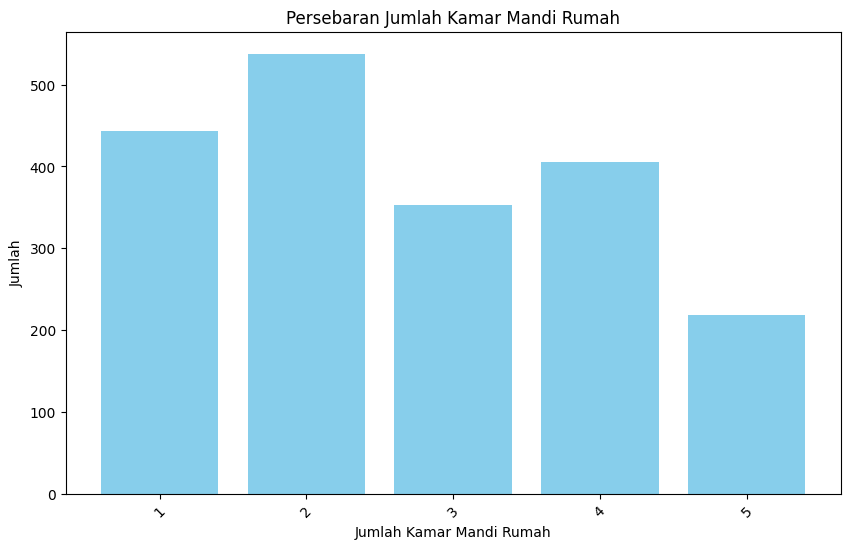

In [40]:
plt.figure(figsize=(10, 6))
plt.bar(total_bathroom['total_bathroom'].head(5), total_bathroom['jumlah'].head(5), color='skyblue')

plt.xlabel('Jumlah Kamar Mandi Rumah')
plt.ylabel('Jumlah')
plt.title('Persebaran Jumlah Kamar Mandi Rumah')
plt.xticks(rotation=45) 

plt.show()


In [41]:
total_parking = df_clean.groupby(by='total_parking').agg({
    'total_parking': 'count',
}).rename(columns={"total_parking":"jumlah"}).sort_values(by='jumlah',ascending= False)
total_parking.reset_index(inplace=True)

total_parking.head(5)

,total_parking,jumlah
0,2.0,727
1,1.0,624
2,4.0,250
3,0.0,195
4,3.0,181


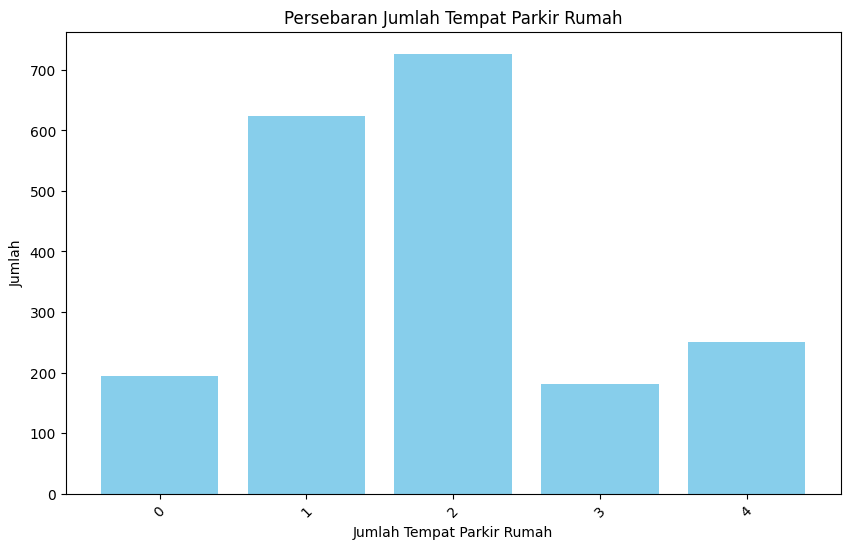

In [42]:
plt.figure(figsize=(10, 6))
plt.bar(total_parking['total_parking'].head(5), total_parking['jumlah'].head(5), color='skyblue')

plt.xlabel('Jumlah Tempat Parkir Rumah')
plt.ylabel('Jumlah')
plt.title('Persebaran Jumlah Tempat Parkir Rumah')
plt.xticks(rotation=45) 

plt.show()


In [43]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2081 entries, 0 to 3552
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price_in_rp       2081 non-null   float64
 1   city              2081 non-null   object 
 2   land_size_m2      2081 non-null   float64
 3   building_size_m2  2081 non-null   float64
 4   floors            2081 non-null   float64
 5   total_bedroom     2081 non-null   float64
 6   total_bathroom    2081 non-null   float64
 7   total_parking     2081 non-null   float64
dtypes: float64(7), object(1)
memory usage: 146.3+ KB


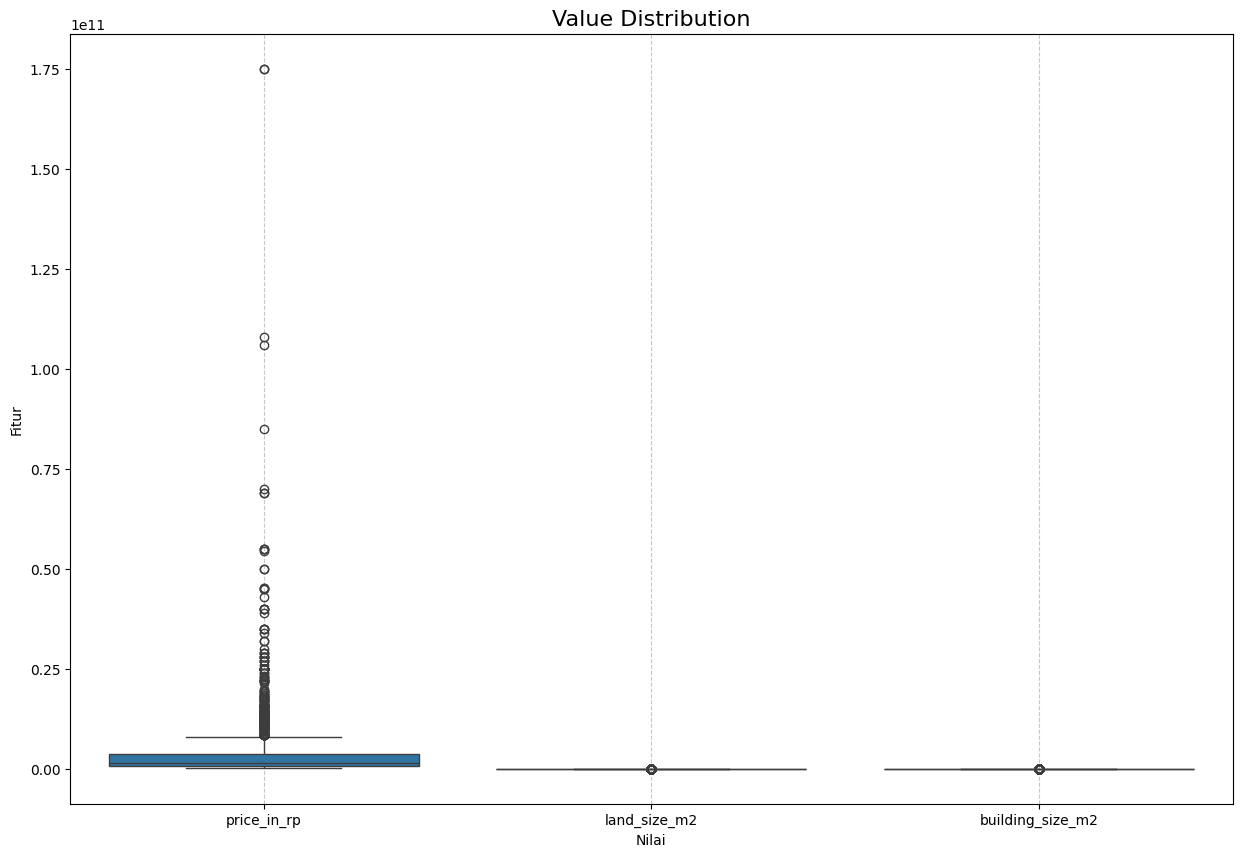

In [44]:
plt.figure(figsize=(15, 10))
sns.boxplot(data= df_clean[["price_in_rp", "land_size_m2", "building_size_m2"]], orient='v')
plt.title('Value Distribution', fontsize=16)
plt.xlabel('Nilai')
plt.ylabel('Fitur')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

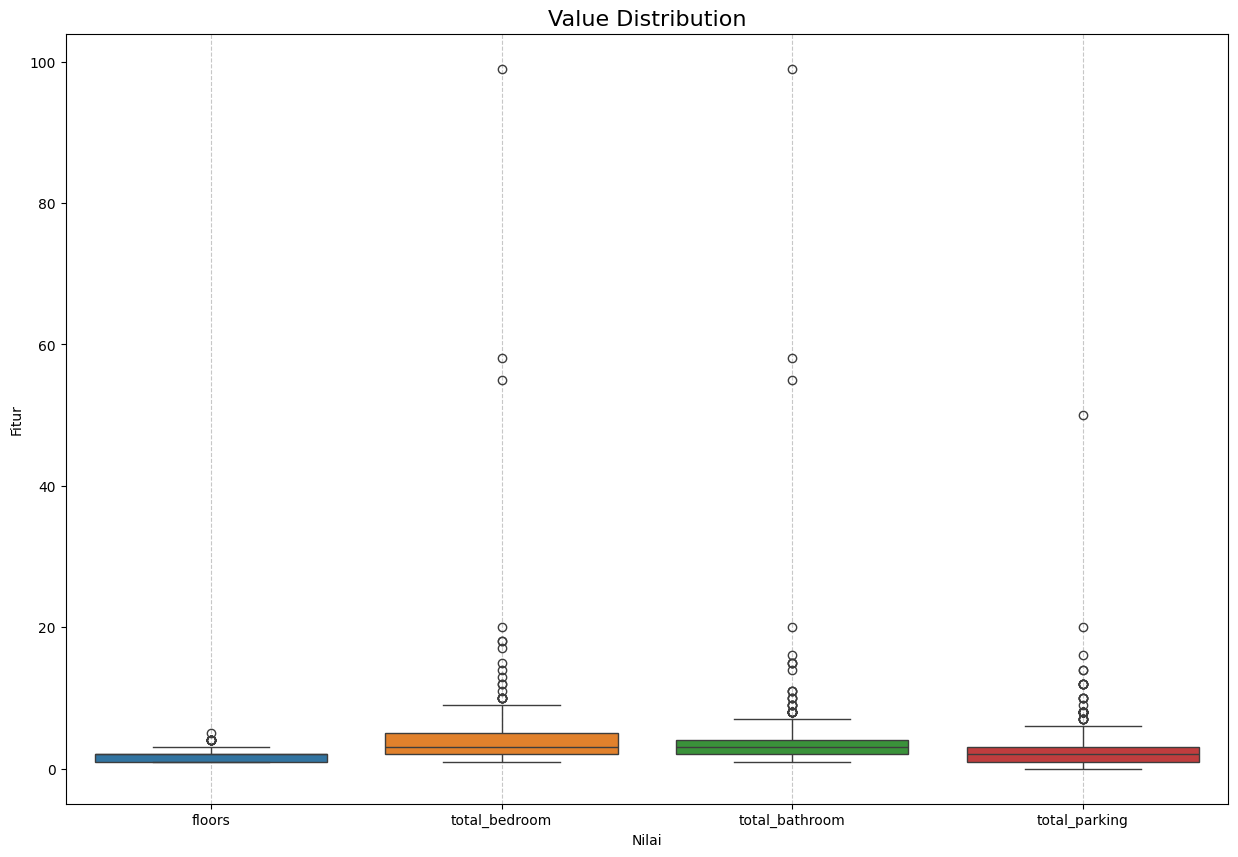

In [45]:
plt.figure(figsize=(15, 10))
sns.boxplot(data= df_clean[["floors", "total_bedroom", "total_bathroom","total_parking"]], orient='v')
plt.title('Value Distribution', fontsize=16)
plt.xlabel('Nilai')
plt.ylabel('Fitur')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

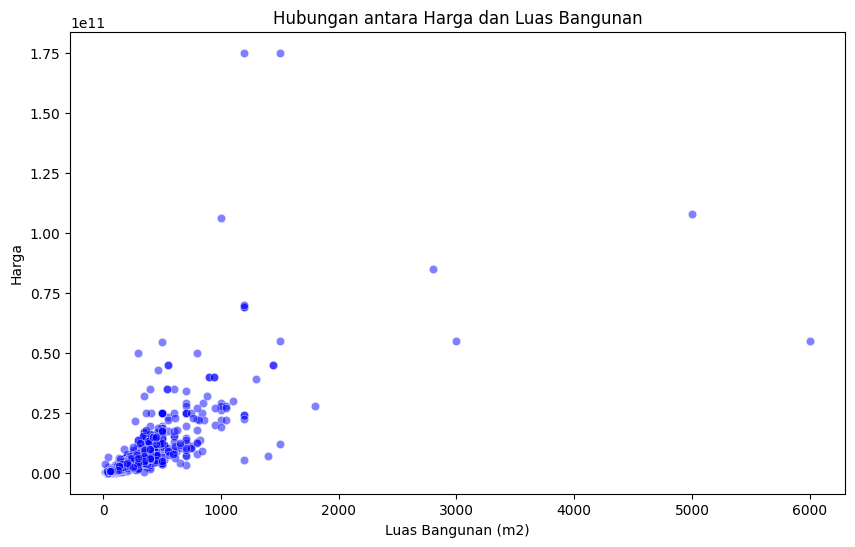

In [ ]:

plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='building_size_m2', y='price_in_rp', data=df_clean, color='blue', alpha=0.5)

plt.title('Hubungan antara Harga dan Luas Bangunan')  
plt.xlabel('Luas Bangunan (m2)')  
plt.ylabel('Harga')  
plt.show()

In [ ]:
df_numeric = df_clean.select_dtypes(include=['float64', 'int64'])

z_scores = df_numeric.apply(zscore)

threshold = 2.0

df_cleaned = df_clean[(z_scores < threshold).all(axis=1)]

In [48]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1955 entries, 0 to 3552
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price_in_rp       1955 non-null   float64
 1   city              1955 non-null   object 
 2   land_size_m2      1955 non-null   float64
 3   building_size_m2  1955 non-null   float64
 4   floors            1955 non-null   float64
 5   total_bedroom     1955 non-null   float64
 6   total_bathroom    1955 non-null   float64
 7   total_parking     1955 non-null   float64
dtypes: float64(7), object(1)
memory usage: 137.5+ KB


In [67]:
df_cleaned.isnull().sum()

price_in_rp         0
city                0
land_size_m2        0
building_size_m2    0
floors              0
total_bedroom       0
total_bathroom      0
total_parking       0
dtype: int64

In [49]:
df_cleaned['floors'] = df_cleaned['floors'].astype(int)
df_cleaned['total_bedroom'] = df_cleaned['total_bedroom'].astype(int)
df_cleaned['total_bathroom'] = df_cleaned['total_bathroom'].astype(int)
df_cleaned['total_parking'] = df_cleaned['total_parking'].astype(int)

C:\Users\Ilyas\AppData\Local\Temp\ipykernel_4388\2185264134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['floors'] = df_cleaned['floors'].astype(int)
C:\Users\Ilyas\AppData\Local\Temp\ipykernel_4388\2185264134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['total_bedroom'] = df_cleaned['total_bedroom'].astype(int)
C:\Users\Ilyas\AppData\Local\Temp\ipykernel_4388\2185264134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [50]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1955 entries, 0 to 3552
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price_in_rp       1955 non-null   float64
 1   city              1955 non-null   object 
 2   land_size_m2      1955 non-null   float64
 3   building_size_m2  1955 non-null   float64
 4   floors            1955 non-null   int32  
 5   total_bedroom     1955 non-null   int32  
 6   total_bathroom    1955 non-null   int32  
 7   total_parking     1955 non-null   int32  
dtypes: float64(3), int32(4), object(1)
memory usage: 106.9+ KB


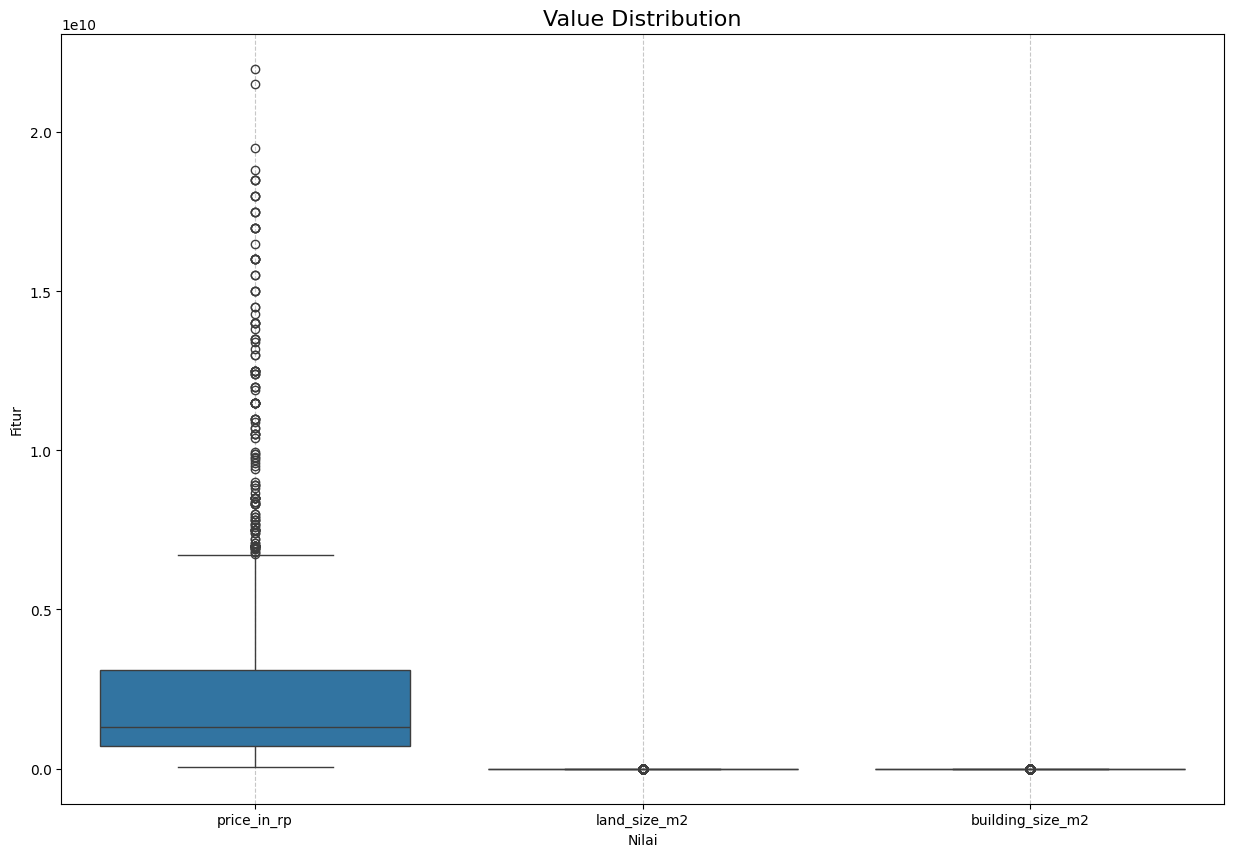

In [51]:
plt.figure(figsize=(15, 10))
sns.boxplot(data= df_cleaned[["price_in_rp", "land_size_m2", "building_size_m2"]], orient='v')
plt.title('Value Distribution', fontsize=16)
plt.xlabel('Nilai')
plt.ylabel('Fitur')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

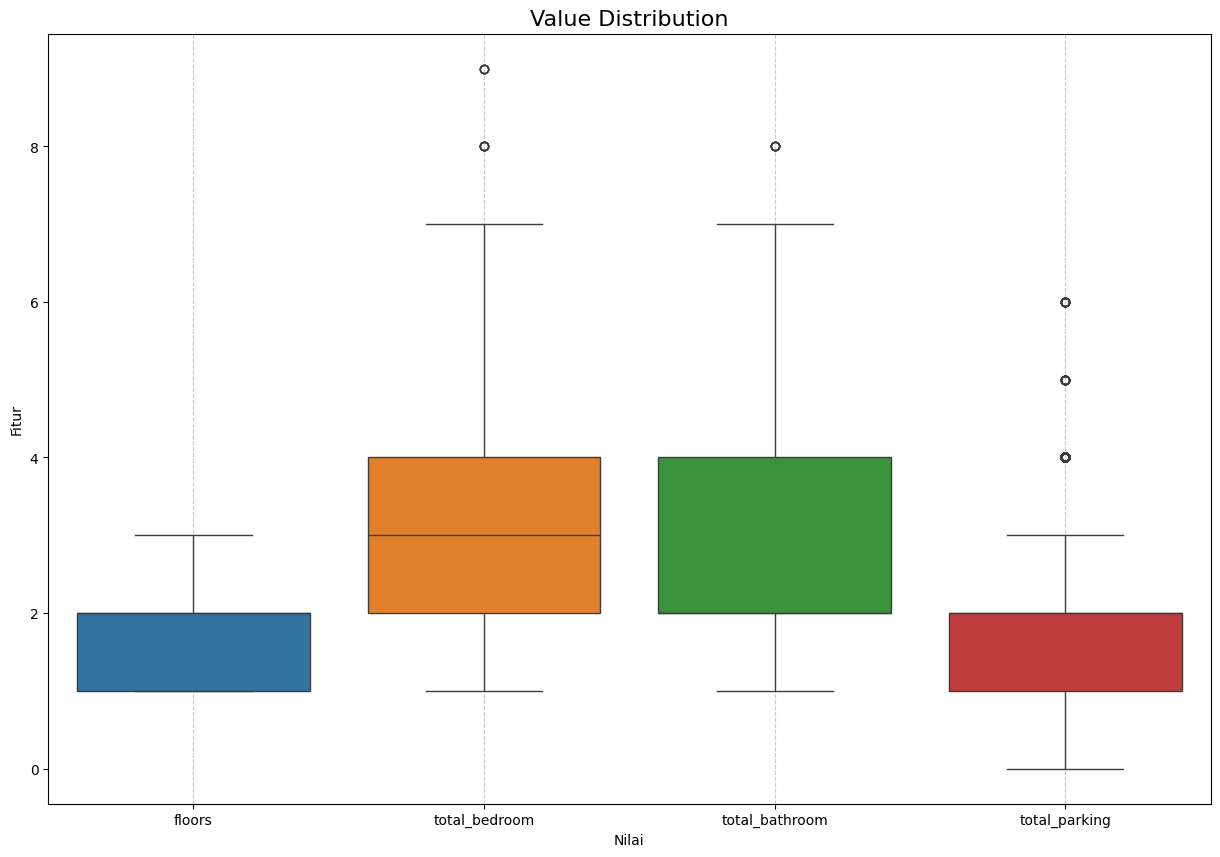

In [52]:
plt.figure(figsize=(15, 10))
sns.boxplot(data= df_cleaned[["floors", "total_bedroom", "total_bathroom","total_parking"]], orient='v')
plt.title('Value Distribution', fontsize=16)
plt.xlabel('Nilai')
plt.ylabel('Fitur')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [53]:
city3 = df_cleaned.groupby(by='city').agg({
    'city': 'count',
}).rename(columns={"city":"jumlah"}).sort_values(by='jumlah',ascending= False)
city3.reset_index(inplace=True)

city3.head(5)

,city,jumlah
0,Bogor,465
1,Tangerang,458
2,Bekasi,371
3,Depok,292
4,Jakarta Selatan,125


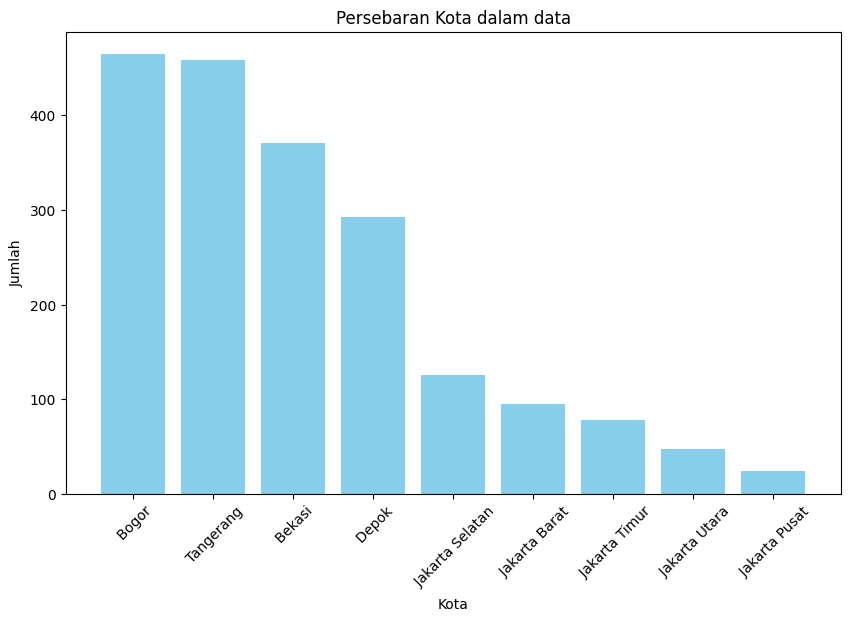

In [54]:
plt.figure(figsize=(10, 6))
plt.bar(city3['city'], city3['jumlah'], color='skyblue')

plt.xlabel('Kota')
plt.ylabel('Jumlah')
plt.title('Persebaran Kota dalam data')
plt.xticks(rotation=45) 

plt.show()

In [55]:
floors = df_cleaned.groupby(by='floors').agg({
    'floors': 'count',
}).rename(columns={"floors":"jumlah"}).sort_values(by='jumlah',ascending= False)
floors.reset_index(inplace=True)

floors.head(5)

,floors,jumlah
0,2,1141
1,1,617
2,3,197


In [56]:
total_bedroom = df_cleaned.groupby(by='total_bedroom').agg({
    'total_bedroom': 'count',
}).rename(columns={"total_bedroom":"jumlah"}).sort_values(by='jumlah',ascending= False)
total_bedroom.reset_index(inplace=True)

total_bedroom.head(5)

,total_bedroom,jumlah
0,3,561
1,2,534
2,4,413
3,5,273
4,6,112


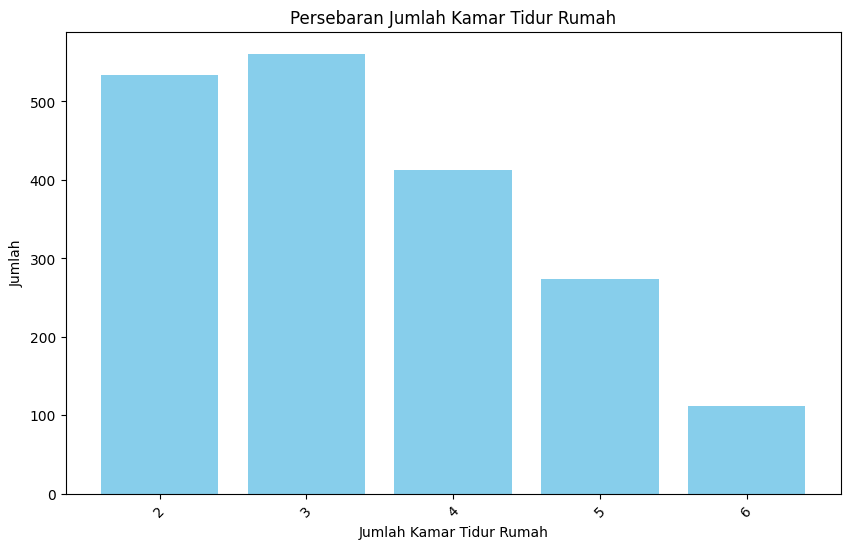

In [57]:
plt.figure(figsize=(10, 6))
plt.bar(total_bedroom['total_bedroom'].head(5), total_bedroom['jumlah'].head(5), color='skyblue')

plt.xlabel('Jumlah Kamar Tidur Rumah')
plt.ylabel('Jumlah')
plt.title('Persebaran Jumlah Kamar Tidur Rumah')
plt.xticks(rotation=45) 

plt.show()


# *Model Building*

In [58]:
x = df_cleaned.drop(columns='price_in_rp')
y = df_cleaned['price_in_rp']

x = pd.get_dummies(x, columns=['city'], drop_first=True)

In [59]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [61]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 2.2737954126804001e+18
Mean Absolute Error (MAE): 829618369.5558214
R-squared: 0.7620146272500192


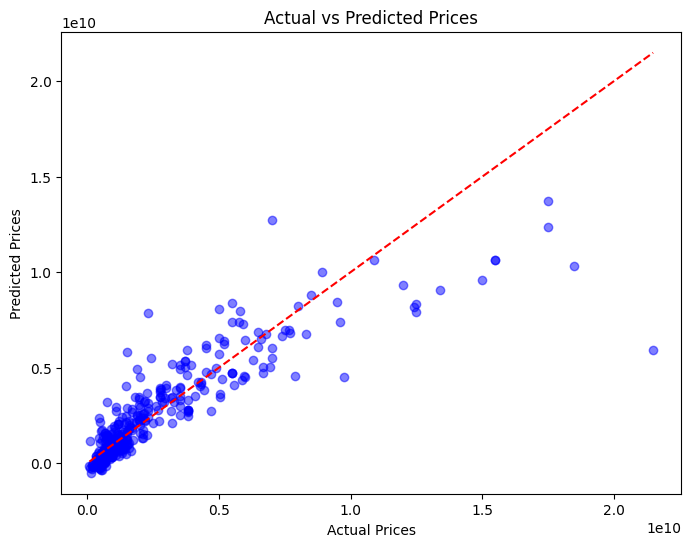

In [ ]:
y_pred = model.predict(x_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

# *Percobaan Prediksi* #

In [ ]:
joblib.dump(model, 'model_rumah.pkl')

joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [ ]:

def predict_price_manual(input_data):

    input_df = pd.DataFrame([input_data], columns=x.columns)


    input_scaled = scaler.transform(input_df)


    predicted_price = model.predict(input_scaled)
    return predicted_price[0]


input_data = {
    'land_size_m2': 100,             # Luas Tanah
    'building_size_m2': 70,          # Luas Bangunan
    'floors': 2 ,                     # Jumlah Lantai
    'total_parking': 1,              # Jumlah Parkir
    'total_bedroom': 3,              # Jumlah Kamar Tidur
    'total_bathroom': 2,             # Jumlah Kamar Mandi
    'city_ Bogor': True,            # Kota Bogor
    'city_ Depok': False,             # Kota Depok
    'city_ Jakarta Barat': False,    # Kota Jakarta Barat
    'city_ Jakarta Pusat': False,    # Kota Jakarta Pusat
    'city_ Jakarta Selatan': False,  # Kota Jakarta Selatan
    'city_ Jakarta Timur': False,    # Kota Jakarta Timur
    'city_ Jakarta Utara': False,    # Kota Jakarta Utara
    'city_ Tangerang': False         # Kota Tangerang
}


for col in x.columns:
    if col not in input_data:
        input_data[col] = 0

predicted_price = predict_price_manual(input_data)
print(f"Prediksi Harga Properti: Rp {predicted_price:,.2f}")


Prediksi Harga Properti: Rp 481,720,929.53
